In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
# import abcpy
import treeswift
from treeswift import Tree, Node
import argparse
import csv
# import UltrametricConversion
from UltrametricConversion import traverse_and_run_average
from UltrametricConversion import transform_data
from UltrametricConversion import normalise_data

# create an argparse parser
# parser = argparse.ArgumentParser(description='Simulate population and tree')

# # add arguments for the simulation parameters
# parser.add_argument('--N', type=int, help='population size')
# parser.add_argument('--generations', type=int, required=False, help='number of generations to simulate')
# parser.add_argument('--disease', type=int, help='number of generations the disease starts')
# parser.add_argument('--mut_samples', type=int, required=False, help='number of mutation samples')
# parser.add_argument('--s', type=float, help='selection coefficient')
# parser.add_argument('--mu', type=float, help='mutation rate')
# # parser.add_argument('--epsilon', type=float, help='Epsilon Threshold')
# parser.add_argument('--sim_number', type=float, help='The number of simulations to run internally', default=1, required=False)
# parser.add_argument('--output_path', type=str, default='.', help='output path')
# parser.add_argument('--observed_data_path', type=str, default='.', help='observed_data_path', required=False)


# # parse the command-line arguments
# args = parser.parse_args()


class Population:
    def __init__(self, N, generations, s):
        self.N = N
        self.s = s
        self.generations = generations
        self.generation_data = []

    def __str__(self):
        return f'Population size: {self.N}, Generations: {self.generations}, Selection: {self.s}'

    def simulate_population(self):
        '''
        Simulate the population using the Wright-Fisher model with selection.
        '''

        # Initialize the first population
        population = np.zeros(self.N, dtype=int)
        population[random.randint(0, self.N - 1)] = 1
        self.generation_data.append(population)
        binom_prob_list  = []
        mut_n_list = []
        
        for gen in range(self.generations):
            mut_n = len(np.where(self.generation_data[gen] == 1)[0])
            mut_n_list.append(mut_n)
            
            cancer_p = (1 + self.s) * mut_n / (self.N + (mut_n * self.s))
            binom_prob_list.append(cancer_p)
                
            offspring = np.random.binomial(n=1, p=cancer_p, size=self.N)
            
            num_mutants = [np.count_nonzero(offspring == 1)]
            
            if num_mutants == 0:
                print('Stochastic Extinction')
                self.generation_data.append(offspring)
                num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]
                # Plot the number of mutants over time
                fig, ax = plt.subplots()
                ax.plot(range(len(num_mutants)), np.log(num_mutants))
                ax.set_xlabel('Time in Generations')
                ax.set_ylabel('Number of mutants ln(N)')
                ax.set_title(f'Mutant allele frequency over time (s={self.s})')
                plt.show()
                return(self.generation_data, binom_prob_list, mut_n_list, fig) 
            
            self.generation_data.append(offspring)
            
        # Plot the number of mutants over time
        # Count the number of individuals with a value of 1 in each generation
        num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]
        
        # Plot the number of mutants over time
        fig, ax = plt.subplots()
        ax.plot(range(len(num_mutants)), np.log(num_mutants))
        ax.set_xlabel('Time in Generations')
        ax.set_ylabel('Number of mutants ln(N)')
        ax.set_title(f'Mutant allele frequency over time (s={self.s})')
        plt.show()
        
        return(self.generation_data, binom_prob_list, mut_n_list, fig) 

In [226]:
class Population:
    def __init__(self, N, generations, disease, s):
        self.N = N
        self.s = s
        self.generations = generations
        self.disease = disease
        self.generation_data = []

    def __str__(self):
        return f'Population size: {self.N}, Generations: {self.generations}, Disease_Onset: {self.disease}, Selection: {self.s}'

    def simulate_population(self):
        '''
        Simulate the population using the Wright-Fisher model with selection.
        '''

        # Initialize the first population
        population = np.zeros(self.N, dtype=int)
        self.generation_data.append(population)
        binom_prob_list = []
        mut_n_list = []

        for gen in range(1, self.generations + 1):
            print(gen)
            if gen < self.disease:
                self.generation_data.append(np.zeros(self.N))
                mut_n_list.append(0)
                binom_prob_list.append(0)
            elif gen == self.disease:
                # first cell with mutation
                print('Disease started')
                population[random.randint(0, self.N - 1)] = 1
                self.generation_data.append(population)
            elif gen > self.disease:
                # clonal expansion
                print('Expansion started')
                print(f'Length self.gen.data: {len(self.generation_data)}')
                print(self.generation_data[gen - 1])
                mut_n = len(np.where(self.generation_data[gen - 1] == 1)[0])
                print(mut_n)
                mut_n_list.append(mut_n)

                cancer_p = (1 + self.s) * mut_n / (self.N + (mut_n * self.s))
                binom_prob_list.append(cancer_p)

                offspring = np.random.binomial(n=1, p=cancer_p, size=self.N)

                num_mutants = [np.count_nonzero(offspring == 1)]

                if num_mutants == 0:
                    print('Stochastic Extinction')
                    self.generation_data.append(offspring)
                    num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]
                    # Plot the number of mutants over time
                    fig, ax = plt.subplots()
                    ax.plot(range(len(num_mutants)), np.log(num_mutants))
                    ax.set_xlabel('Time in Generations')
                    ax.set_ylabel('Number of mutants ln(N)')
                    ax.set_title(f'Mutant allele frequency over time (s={self.s})')
                    return (self.generation_data, binom_prob_list, mut_n_list, fig)

                self.generation_data.append(offspring)
        
        # Plot the number of mutants over time
        # Count the number of individuals with a value of 1 in each generation
        num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]

        # Plot the number of mutants over time
        fig, ax = plt.subplots()
        ax.plot(range(len(num_mutants)), np.log(num_mutants))
        ax.set_xlabel('Time in Generations')
        ax.set_ylabel('Number of mutants ln(N)')
        ax.set_title(f'Mutant allele frequency over time (s={self.s})')

        return (self.generation_data, binom_prob_list, mut_n_list, fig)

        # for gen in range(self.generations):
        #     mut_n = len(np.where(self.generation_data[gen] == 1)[0])
        #     mut_n_list.append(mut_n)

        #     cancer_p = (1 + self.s) * mut_n / (self.N + (mut_n * self.s))
        #     binom_prob_list.append(cancer_p)

        #     offspring = np.random.binomial(n=1, p=cancer_p, size=self.N)

        #     num_mutants = [np.count_nonzero(offspring == 1)]

        #     if num_mutants == 0:
        #         print('Stochastic Extinction')
        #         self.generation_data.append(offspring)
        #         num_mutants = [np.count_nonzero(generation == 1) for generation in self.generation_data]
        #         # Plot the number of mutants over time
        #         fig, ax = plt.subplots()
        #         ax.plot(range(len(num_mutants)), np.log(num_mutants))
        #         ax.set_xlabel('Time in Generations')
        #         ax.set_ylabel('Number of mutants ln(N)')
        #         ax.set_title(f'Mutant allele frequency over time (s={self.s})')
        #         return(self.generation_data, binom_prob_list, mut_n_list, fig)

        #     self.generation_data.append(offspring)


In [247]:
def build_leaf_to_root_connections(tree_mask, mut_samples):
    '''
    Simulate the population using the Wright-Fisher model with selection.
    '''
    # List of each generation, where each generation is a dict from node_idx to set of leaves
    node_to_leaves = []
    desired_number = mut_samples

    # Initialize the list of generations
    for generation_idx, generation in enumerate(tree_mask):
        node_to_leaves.append({})
        for node_idx, node in enumerate(generation):
            if node == 1:
                node_to_leaves[-1][node_idx] = set()

    assert desired_number <= len(node_to_leaves[-1])
    node_to_leaves[-1] = {
        id: set()
        for id in np.random.choice(
            list(node_to_leaves[-1].keys()),
            desired_number,
            replace=False
        )
    }

    # Go backward from leaf to root, randomly assigning each leaf to a parent
    for leaf_idx in node_to_leaves[-1].keys(): # this loop iterates over each leaf
        leaf_to_follow = None
        for generation_idx, generation in reversed( # this inner loop traverses the generations in reverse order, excluding the most recent one.
                list(enumerate(node_to_leaves[:-1]))
        ):
            if not generation:  # Skip if the generation has no nodes
                print('No mutants yet')
                continue
           # If we already have a leaf to follow, pick it's ancestor, otherwise pick a random one
            if leaf_to_follow is not None:
                parent_idx = next(
                    node
                    for node, leaves in generation.items()
                    if leaf_to_follow in leaves
                )
            else:
                parent_idx = random.choice(list(generation.keys()))

            # If the parent already has a leaf, pick it's ancestor in all previous generations to avoid cycles
            if len(node_to_leaves[generation_idx][parent_idx]) > 0:
                leaf_to_follow = list(node_to_leaves[generation_idx][parent_idx])[0]

            # Add the leaf to the parent
            node_to_leaves[generation_idx][parent_idx].add(
                (len(node_to_leaves) - 1, leaf_idx)
            )

    # Drop any non leaves that weren't connected
    # Create a dict from node coordinates to leaf coordinates
    result = {}

    for generation_idx, generation in enumerate(node_to_leaves):
        for node_idx, leaves in generation.items():
            if generation_idx == len(node_to_leaves) - 1 or len(leaves) > 0:
                result[str((generation_idx, node_idx))] = {str(leaf) for leaf in leaves}

    return result


def clusters_to_nodes(tree_clusters):
    '''
    the following function goes from a nested dictionary of clades, creates the root node, adds node to that root
    and then establishes parent and children relationships    '''

    label_to_node = {cluster: Node(label=cluster) for cluster in tree_clusters}
    root_name = list(tree_clusters.keys())[0]

    # Connect each node with it's leaves
    for parent_label, leaf_labels in tree_clusters.items():
        parent_node = label_to_node[parent_label]
        for leaf_label in leaf_labels:
            leaf_node = label_to_node[leaf_label]
            parent_node.add_child(leaf_node)

    # Connect each node with all descendants
    for node1 in label_to_node.values():
        for node2 in label_to_node.values():
            if node1 == node2:
                continue
            
            print('one gen apart')
            possible_parent = node1 if len(node1.child_nodes()) > len(node2.child_nodes()) else node2
            possible_child = node2 if possible_parent is node1 else node1

            parent_leaf_labels = {node.label for node in possible_parent.child_nodes()}
            child_leaf_labels = {node.label for node in possible_child.child_nodes()}
            is_descendant = child_leaf_labels.issubset(parent_leaf_labels)

            if is_descendant and possible_child not in possible_parent.child_nodes() and possible_child.child_nodes():
                possible_parent.add_child(possible_child)

    ########  Remove non-direct descendants
                # node_1_gen = int(node1.label.split(',')[0][1:])  # split the key on comma, take the first element, and remove the opening parenthesis
            # node_2_gen = int(node2.label.split(',')[0][1:])  # split the key on comma, take the first element, and remove the opening parenthesis
        
            # if abs(node_2_gen - node_1_gen) > 1:
            #     continue
    next_nodes = {label_to_node[root_name]}
    while next_nodes:
        node = next_nodes.pop()
        for child in node.child_nodes():
            next_nodes.add(child)
            child.set_parent(node)
            for grandchild in child.child_nodes():
                if grandchild in node.child_nodes():
                    node.remove_child(grandchild)

    # Create the tree using TreeSwift
    tree = Tree()
    tree.root = label_to_node[root_name]

    return tree , label_to_node


def assign_edge_lengths(mu, tree):
    '''
    Iterate through the tree class and assign edge lengths based on a Poisson distribution with mean rate μ.
    '''
    for node in tree.traverse_preorder():
        length = np.random.poisson(mu)
        node.set_edge_length(length)
    return tree


In [241]:
tree_clusters_Maria = {
    '(1,1)': {
        '(4,1)',
        '(4,2)',
        '(4,3)',
        '(4,4)',
        '(4,5)',
    },
    '(2,1)' : {
        '(4,4)',
        '(4,5)',
    },
    '(2,2)' : {
        '(4,1)',
        '(4,2)',
        '(4,3)',
    },
    '(3,1)' : {
        '(4,5)',
    },
    '(4,1)': {},
    '(4,2)': {},
    '(4,3)': {},
    '(4,4)': {},
    '(4,5)': {},
}


# label_to_node = {cluster: Node(label=cluster) for cluster in tree_clusters}
# root_name = list(tree_clusters.keys())[0]

# # Connect each node with it's leaves
# for parent_label, leaf_labels in tree_clusters.items():
#     parent_node = label_to_node[parent_label]
#     for leaf_label in leaf_labels:
#         leaf_node = label_to_node[leaf_label]
#         parent_node.add_child(leaf_node)

# # Connect each node with all descendants
# for node1 in label_to_node.values():
#     for node2 in label_to_node.values():
#         if node1 == node2:
#             continue

#         node_1_gen = int(node1.label.split(',')[0][1:])  # split the key on comma, take the first element, and remove the opening parenthesis
#         print(node1.label)
#         print(node_1_gen)
#         node_2_gen = int(node2.label.split(',')[0][1:])  # split the key on comma, take the first element, and remove the opening parenthesis
#         #print(node_2_gen)
        
#         if abs(node_2_gen - node_1_gen) > 1:
#             continue

#         #print('one gen apart')
#         possible_parent = node1 if len(node1.child_nodes()) > len(node2.child_nodes()) else node2
#         possible_child = node2 if possible_parent is node1 else node1

#         parent_leaf_labels = {node.label for node in possible_parent.child_nodes()}
#         child_leaf_labels = {node.label for node in possible_child.child_nodes()}
#         is_descendant = child_leaf_labels.issubset(parent_leaf_labels)

#         if is_descendant and possible_child not in possible_parent.child_nodes() and possible_child.child_nodes():
#             possible_parent.add_child(possible_child)
        

# #######  Remove non-direct descendants
# next_nodes = {label_to_node[root_name]}
# while next_nodes:
#     node = next_nodes.pop()
#     for child in node.child_nodes():
#         next_nodes.add(child)
#         child.set_parent(node)
#         for grandchild in child.child_nodes():
#             if grandchild in node.child_nodes():
#                 node.remove_child(grandchild)

# # Create the tree using TreeSwift
# tree = Tree()
# tree.root = label_to_node[root_name]
# tree.newick()


one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one gen apart
one ge

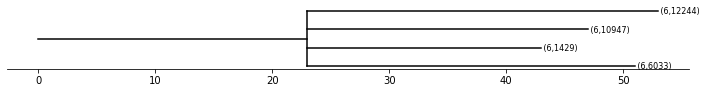

In [243]:
gen_tree, label_vals = clusters_to_nodes(tree_clusters)
# from treeswift import read_tree_newick
tree_string = gen_tree.newick()
phy_tree = read_tree_newick(tree_string)
print('Genealogy Done')
# assign random edge (branch) lengths
phy_tree_mut = assign_edge_lengths(25, phy_tree)
#phy_tree_mut.write_tree_newick(f'{output_path}/Simulation_{args.N}_{args.generations}_{args.disease}_{args.mut_samples}_{args.s}_output_gen_tree.nwk', hide_rooted_prefix=False)
# make tree ultrametric
phy_tree_mut.draw(show_labels=True)

1
Disease started
2
Expansion started
Length self.gen.data: 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1
3
Expansion started
Length self.gen.data: 3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2
4
Expansion started
Length self.gen.data: 4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

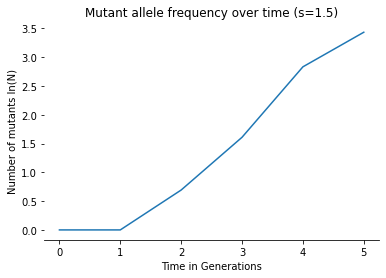

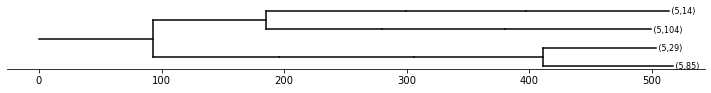

In [249]:
# # initiate population
popul = Population(200, 5, 1, 1.5)
# #print(popul) 
# # go from population array to tree_clusters dictionary
gen, prob, mut, fig = popul.simulate_population()

tree_clusters = build_leaf_to_root_connections(gen, 4)
# create phylo tree
gen_tree, label_vals = clusters_to_nodes(tree_clusters)
# from treeswift import read_tree_newick
tree_string = gen_tree.newick()
phy_tree = read_tree_newick(tree_string)
print('Genealogy Done')
# assign random edge (branch) lengths
phy_tree_mut = assign_edge_lengths(100, phy_tree)
#phy_tree_mut.write_tree_newick(f'{output_path}/Simulation_{args.N}_{args.generations}_{args.disease}_{args.mut_samples}_{args.s}_output_gen_tree.nwk', hide_rooted_prefix=False)
# make tree ultrametric
phy_tree_mut.draw(show_labels=True)

In [250]:
tree_clusters

{'(0, 173)': {'(5, 104)', '(5, 14)', '(5, 29)', '(5, 85)'},
 '(1, 173)': {'(5, 104)', '(5, 14)', '(5, 29)', '(5, 85)'},
 '(2, 72)': {'(5, 104)', '(5, 14)'},
 '(2, 167)': {'(5, 29)', '(5, 85)'},
 '(3, 105)': {'(5, 14)'},
 '(3, 158)': {'(5, 104)'},
 '(3, 170)': {'(5, 29)', '(5, 85)'},
 '(4, 10)': {'(5, 14)'},
 '(4, 75)': {'(5, 29)', '(5, 85)'},
 '(4, 85)': {'(5, 104)'},
 '(5, 29)': set(),
 '(5, 104)': set(),
 '(5, 85)': set(),
 '(5, 14)': set()}

In [236]:
phy_tree_mut.write_tree_newick(f'/Users/mkalyva/DATA/MSI_evolution_2022/MPN_trees/output_gen_tree.nwk', hide_rooted_prefix=False)


In [84]:
def build_leaf_to_root_connections(tree_mask):
    '''
     Simulate the population using the Wright-Fisher model with selection.
    '''
    # List of each generation, where each generation is a dict from node_idx to set of leaves
    node_to_leaves = []
    # Initialize the list of generations
    for generation_idx, generation in enumerate(tree_mask):
        node_to_leaves.append({})
        for node_idx, node in enumerate(generation):
            if node == 1:
                node_to_leaves[-1][node_idx] = set()
    # Go backward from leaf to root, randomly assigning each leaf to a parent
    for leaf_idx in node_to_leaves[-1].keys():
        for generation_idx, generation in reversed(
            list(enumerate(node_to_leaves[:-1]))
        ):
            parent_idx = random.choice(list(generation.keys()))
            node_to_leaves[generation_idx][parent_idx].add(
                (len(node_to_leaves) - 1, leaf_idx)
            )
    # Drop any non leaves that weren't connected
    # Create a dict from node coordinates to leaf coordinates
    result = {}
    for generation_idx, generation in enumerate(node_to_leaves):
        for node_idx, leaves in generation.items():
            if generation_idx == len(node_to_leaves) - 1 or len(leaves) > 0:
                result[str((generation_idx, node_idx))] = {str(leaf) for leaf in leaves}
    return result

########  if _name_ == '_main_':
########     build_leaf_to_root_connections(tree_mask)


def clusters_to_nodes(tree_clusters):
    '''
    the following function goes from a nested dictionary of clades, creates the root node, adds node to that root 
    and then establishes parent and children relationships    '''
    
    label_to_node = {cluster: Node(label=cluster) for cluster in tree_clusters}

    # Connect each node with it's leaves 
    for parent_label, leaf_labels in tree_clusters.items():
        parent_node = label_to_node[parent_label]
        for leaf_label in leaf_labels:
            leaf_node = label_to_node[leaf_label]
            parent_node.add_child(leaf_node)

    # Connect each node with all descendants
    for node1 in label_to_node.values():
        for node2 in label_to_node.values():
            if node1 == node2:
                continue

            possible_parent = node1 if len(node1.child_nodes()) > len(node2.child_nodes()) else node2
            possible_child = node2 if possible_parent is node1 else node1
            
            parent_leaf_labels = {node.label for node in possible_parent.child_nodes()}
            child_leaf_labels = {node.label for node in possible_child.child_nodes()}
            is_descendant = child_leaf_labels.issubset(parent_leaf_labels)

            if is_descendant and possible_child not in possible_parent.child_nodes() and possible_child.child_nodes():
                possible_parent.add_child(possible_child)

########  Remove non-direct descendants
    next_nodes = {label_to_node['1']}
    while next_nodes:
        node = next_nodes.pop()
        for child in node.child_nodes():
            next_nodes.add(child)
            child.set_parent(node)
            for grandchild in child.child_nodes():
                if grandchild in node.child_nodes():
                    node.remove_child(grandchild)


    # Create the tree using TreeSwift
    tree = Tree()
    tree.root = label_to_node[root_name]

    return tree